# Plot the stimulation protocol

Author: Bjarne Schultze <br>
Last modified: 29.11.2024

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb

import modules.plotting_utils as myplt

plt.style.use('./plotstyle_bjarne.mplstyle')

In [2]:
# Set paths
main_path = "E:/res/"
metadata_path = "E:/MT/additional_files/metadata.pkl"

# Define colors
vib_col = to_rgb("#04A83D")   # '#46A81F'
pulse_col = to_rgb("#ff0000")  # '#5D11AD' 
sine_col = to_rgb("#2d7cff")  # '#F07236' 
sine_col_light = to_rgb("#78CEFF")
pulse_col_light = to_rgb("#FF776F")
vib_col_light = to_rgb("#7DD189")

stim_col='#DB0D55'

# Load metadata file (first five files with different protocol are missing)
metadata = pd.read_pickle(metadata_path)

# Get pIP10 and vPR13 experiments (as examples)
exp_pip10 = metadata.loc[metadata["genotype"] == "CsChrimson; VT40556", :]
exp_vpr13 = metadata.loc[metadata["genotype"] == "vPR13_CsChrimson", :]

In [3]:
# Read the calibration table for the light intensity
with open("../additional_files/opto_calibration_120_5.txt") as f:
    lines = f.readlines()
opto_calib_pip10 = np.sort(np.array([ txt.removesuffix('\n').split(',') for txt in lines ]).astype('float'), axis=0)
# For the normal protocol (all other conditions)
with open("../additional_files/opto_calibration_26_4.txt") as f:
    lines = f.readlines()
opto_calib = np.sort(np.array([ txt.removesuffix('\n').split(',') for txt in lines ]).astype('float'), axis=0)

In [4]:
# Create time vector
rec_len = 1799.0
srate = exp_pip10.loc[16, "sampling_rate"]
time_vec = np.arange(0, rec_len, 1/srate) / 60  # [min]

# Two zero-array of the same shape
red_light_pip10 = np.zeros(time_vec.shape)
red_light_vpr13 = np.zeros(time_vec.shape)

# Fill the arrays with the stimulus values
for start,stop,volt in zip(exp_pip10.loc[16, "stim_on"], exp_pip10.loc[16, "stim_off"], exp_pip10.loc[16, "stim_volt"]):
    red_light_pip10[start:stop] = opto_calib_pip10[opto_calib_pip10[:,0] == volt, 1][0]

for start,stop,volt in zip(exp_vpr13.loc[25, "stim_on"], exp_vpr13.loc[25, "stim_off"], exp_vpr13.loc[25, "stim_volt"]):
    red_light_vpr13[start:stop] = opto_calib[opto_calib[:,0] == volt, 1][0]

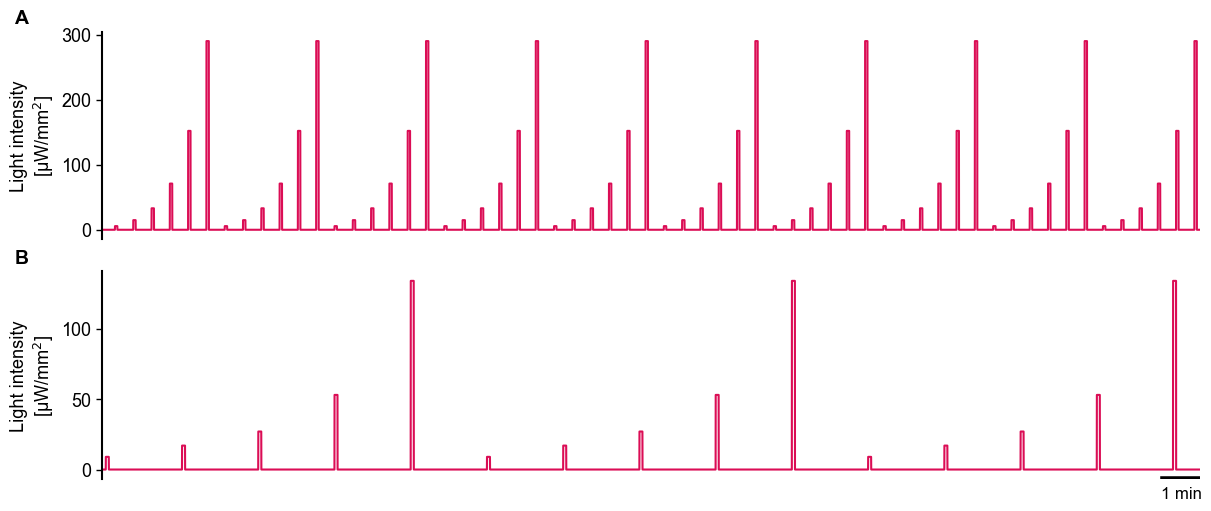

In [7]:
# Set up a new figure
fig, ax = plt.subplots(2, 1, figsize=(12,5))

# Plot the stimulation protocols
ax[1].plot(time_vec, red_light_pip10, label="pIP10", color=stim_col)
ax[0].plot(time_vec, red_light_vpr13, label="others", color=stim_col)
ax1_ylim = ax[1].get_ylim()

# Remove spines and add a scale bar
ax[0].spines['bottom'].set_visible(False)
ax[0].set_xticks([])
myplt.axis_to_scale(ax[1], "min", fontsize=12, txt_offset=5)
ax[1].set_ylim(ax1_ylim)

# Label the axes
ax[0].set_ylabel(r"Light intensity" + "\n" + r"[µW/mm$^2$]")
ax[1].set_ylabel(r"Light intensity" + "\n" + r"[µW/mm$^2$]")
ax[0].set_title("A", x=-0.08, y=1.0, fontsize=14)
ax[1].set_title("B", x=-0.08, y=1.0, fontsize=14)

fig.savefig("../figures_wip/stimulation_protocol.pdf")

In [ ]:
print("pIP10\n", opto_calib_pip10[:,1])
print("Others\n", opto_calib[:,1])